<a href="https://colab.research.google.com/github/Aishwarya14-debug/CNN_Image_Class/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

[6]


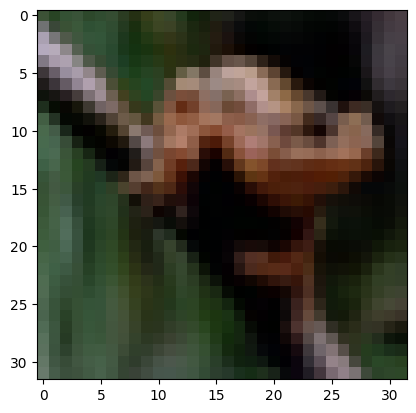

In [ ]:
i = 5000
plt.imshow(X_train[i])
print(y_train[i])

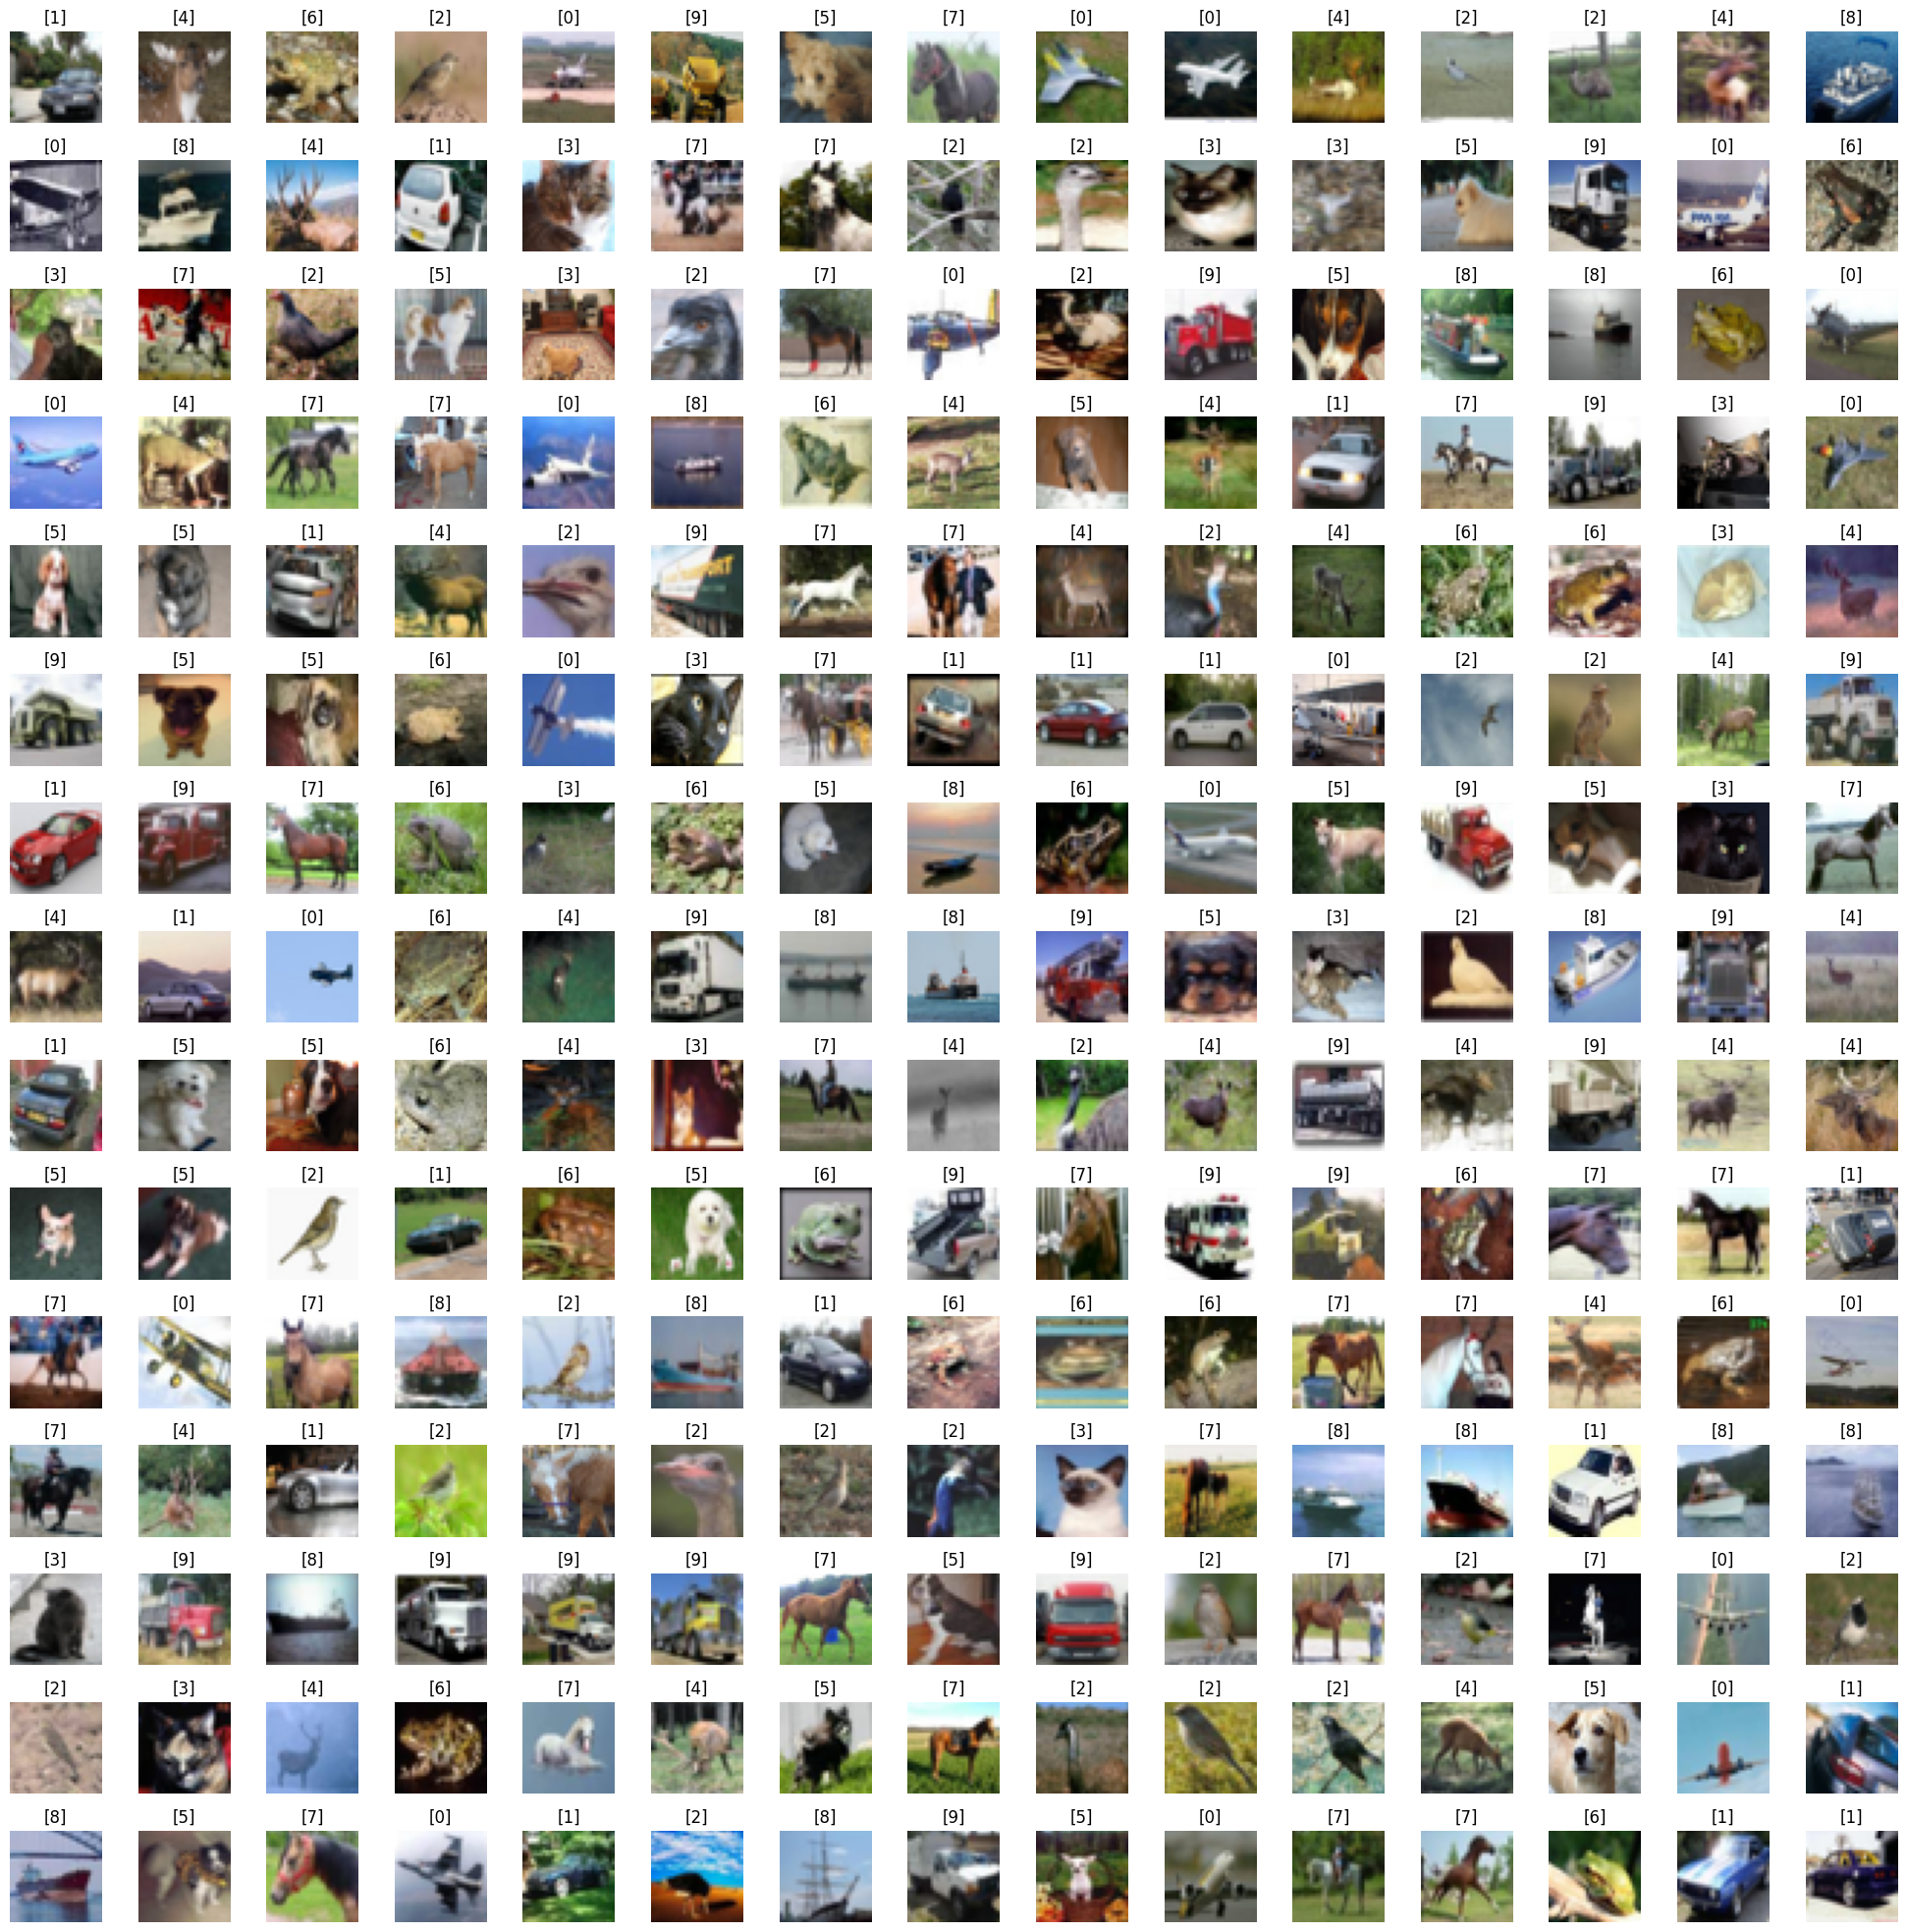

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [ ]:
n_training

50000

In [ ]:
 X_train = X_train.astype('float32')
 X_test = X_test.astype('float32')

In [ ]:
number_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)


In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

In [42]:
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [43]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))



In [44]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [45]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 143ms/step - accuracy: 0.3228 - loss: 1.8477
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 151ms/step - accuracy: 0.5844 - loss: 1.1789


In [46]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.6478 - loss: 0.9988
Test Accuracy: 0.6402000188827515


In [47]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [ ]:
print(predicted_classes)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange  (0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [ ]:
import keras
from keras.datasets import cifar10
(X_train,Y_train), (X_test, Y_test) = cifar10.load_data()


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt

# Example Data Generator
dataget_train = ImageDataGenerator(rotation_range=90)

# Sample data (replace with your actual data)
X_train_sample = X_train[:10]  # First 10 images for demonstration
n = len(X_train_sample)  # Number of images to display

dataget_train.fit(X_train_sample)

# Display augmented images
fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)  # Correct subplot indexing
        ax.imshow(Image.fromarray((x_batch[i] * 255).astype('uint8')))  # Convert to image
        ax.axis('off')  # Turn off axis for better visualization

    fig.suptitle('Augmented Images (Rotated 90 Degrees)', fontsize=16)
    plt.show()
    break